In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import sklearn.svm as svm
import random 

In [2]:
class_paths = ['./svm/train/0', './svm/train/1', './svm/train/2', 
               './svm/train/3', './svm/train/4', './svm/train/5']
images = [[] for i in range(6)]
for i  in range(len(class_paths)):
    for filename in os.listdir(class_paths[i]):
        img = cv2.imread(os.path.join(class_paths[i], filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            images[i].append(flattened_img)

In [3]:
trainX = np.array(images[0] + images[1] + images[2] + images[3] + images[4] + images[5])
trainY = np.array([0] * len(images[0]) + [1] * len(images[1]) + [2] * len(images[2]) + [3]*len(images[3]) + [4]*len(images[4]) + [5]*len(images[5]))

In [4]:
# 5 - Fold Validation
# Dividing into 5 parts
K = 5
m = len(trainX)
shuffled_indices = np.arange(m)
np.random.shuffle(shuffled_indices)

X_shuffled = trainX[shuffled_indices]
Y_shuffled = trainY[shuffled_indices]

In [5]:
X = []
for i in range(K):
    X.append(X_shuffled[i*int(m/K):(i+1)*int(m/K)])
Y = []
for i in range(K):
    Y.append(Y_shuffled[i*int(m/K):(i+1)*int(m/K)])
X = np.array(X)
Y = np.array(Y)

In [8]:
file = open("2_multi_d.txt", "w")

In [9]:
# K Fold Validation
def K_Fold_Validation(X, Y, C, gamma=0.001):
    print(C)
    file.write(f"Value of C: {C}, Value of gamma: {gamma}\n")
    global_accuracy = 0
    global_correct = 0
    global_incorrect = 0
    for i in range(len(X)):
        X_train = np.concatenate([X[j] for j in range(len(X)) if j != i])
        Y_train = np.concatenate([Y[j] for j in range(len(Y)) if j != i])
        X_test = X[i]
        Y_test = Y[i]
        print(f"Starting Training for fold {i}\n")
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X_train, Y_train)
        print(f"Starting Testing for fold {i}\n")
        Y_pred = clf.predict(X_test)
        correct = np.sum(Y_pred == Y_test)
        incorrect = np.sum(Y_pred != Y_test)
        accuracy = correct / (correct + incorrect)
        file.write(f"Accuracy for fold {i}: {accuracy}\n")
        global_correct += correct
        global_incorrect += incorrect
    global_accuracy = (global_correct) / (global_correct + global_incorrect)
    file.write(f"Final Accutacy: {global_accuracy}\n\n")

In [10]:
C_list = [1e-5, 1e-3, 1, 5, 10]
for C in C_list:
    K_Fold_Validation(X, Y, C)

1e-05
Starting Training for fold 0

Starting Testing for fold 0

Starting Training for fold 1

Starting Testing for fold 1

Starting Training for fold 2

Starting Testing for fold 2

Starting Training for fold 3

Starting Testing for fold 3

Starting Training for fold 4

Starting Testing for fold 4

0.001
Starting Training for fold 0

Starting Testing for fold 0

Starting Training for fold 1

Starting Testing for fold 1

Starting Training for fold 2

Starting Testing for fold 2

Starting Training for fold 3

Starting Testing for fold 3

Starting Training for fold 4

Starting Testing for fold 4

1
Starting Training for fold 0

Starting Testing for fold 0

Starting Training for fold 1

Starting Testing for fold 1

Starting Training for fold 2

Starting Testing for fold 2

Starting Training for fold 3

Starting Testing for fold 3

Starting Training for fold 4

Starting Testing for fold 4

5
Starting Training for fold 0

Starting Testing for fold 0

Starting Training for fold 1

Starting T

In [11]:
file.close()

In [12]:
validation_paths = ['./svm/val/0', './svm/val/1', './svm/val/2', 
                    './svm/val/3', './svm/val/4', './svm/val/5']
validation_images = [[] for i in range(6)]
for i  in range(len(validation_paths)):
    for filename in os.listdir(validation_paths[i]):
        img = cv2.imread(os.path.join(validation_paths[i], filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            validation_images[i].append(flattened_img)

In [13]:
newfile = open("2_multi_d_valid.txt", "a")

In [14]:
def validation_test(C, gamma=0.001):
    print(f"Value of C = {C}")
    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(trainX, trainY)
    correct = 0
    incorrect = 0
    for i in range(len(validation_images)):
        for j in range(len(validation_images[i])):
            pred = clf.predict([validation_images[i][j]])
            if pred == i:
                correct += 1
            else:
                incorrect += 1
    accuracy = correct / (correct + incorrect)
    newfile.write(f"Value of C = {C}\nCorrect = {correct}\nIncorrect = {incorrect}\nAccuracy = {accuracy}\n\n")

In [15]:
for C in C_list:
    validation_test(C)
newfile.close()

Value of C = 1e-05
Value of C = 0.001
Value of C = 1
Value of C = 5
Value of C = 10


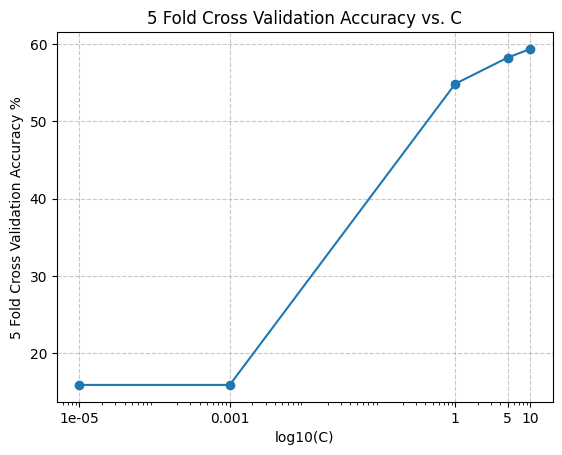

In [3]:
import matplotlib.pyplot as plt

# Values of C
C_values = [1e-5, 1e-3, 1, 5, 10]

# Corresponding accuracy values
accuracy_values = [15.896, 15.896, 54.853, 58.249, 59.370]

# Create the plot
# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.semilogx(C_values, accuracy_values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('log10(C)')
plt.ylabel('5 Fold Cross Validation Accuracy %')
plt.title('5 Fold Cross Validation Accuracy vs. C')

# Set the x-axis ticks to display as powers of 10
plt.xticks(C_values, [f'{C}' for C in C_values])

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

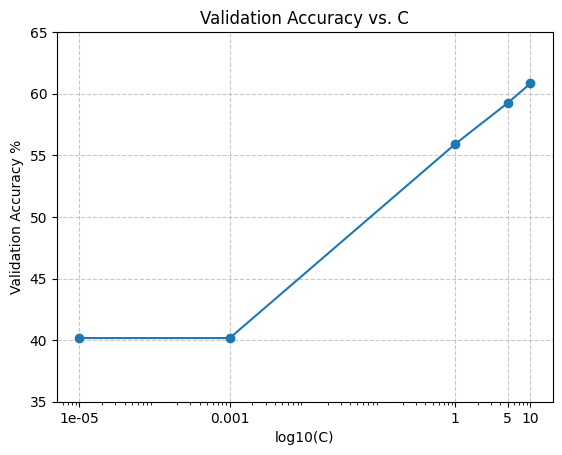

In [6]:
import matplotlib.pyplot as plt

# Values of C
C_values = [1e-5, 1e-3, 1, 5, 10]

# Corresponding accuracy values
accuracy_values = [40.167, 40.167, 55.916, 59.250, 60.833]

# Create the plot
# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.semilogx(C_values, accuracy_values, marker='o', linestyle='-')

# Set labels and title
plt.ylim(35, 65)
plt.xlabel('log10(C)')
plt.ylabel('Validation Accuracy %')
plt.title('Validation Accuracy vs. C')

# Set the x-axis ticks to display as powers of 10
plt.xticks(C_values, [f'{C}' for C in C_values])

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()